# Task 10 : Benchmark Top ML Algorithms

This task tests your ability to use different ML algorithms when solving a specific problem.


### Dataset
Predict Loan Eligibility for Dream Housing Finance company

Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers.

Train: https://raw.githubusercontent.com/subashgandyer/datasets/main/loan_train.csv

Test: https://raw.githubusercontent.com/subashgandyer/datasets/main/loan_test.csv

## Task Requirements
### You can have the following Classification models built using different ML algorithms
- Decision Tree
- KNN
- Logistic Regression
- SVM
- Random Forest
- Any other algorithm of your choice

### Use GridSearchCV for finding the best model with the best hyperparameters

- ### Build models
- ### Create Parameter Grid
- ### Run GridSearchCV
- ### Choose the best model with the best hyperparameter
- ### Give the best accuracy
- ### Also, benchmark the best accuracy that you could get for every classification algorithm asked above

#### Your final output will be something like this:
- Best algorithm accuracy
- Best hyperparameter accuracy for every algorithm

**Table 1 (Algorithm wise best model with best hyperparameter)**

Algorithm   |     Accuracy   |   Hyperparameters
- DT
- KNN
- LR
- SVM
- RF
- anyother

**Table 2 (Best overall)**

Algorithm    |   Accuracy    |   Hyperparameters



### Submission
- Submit Notebook containing all saved ran code with outputs
- Document with the above two tables

In [512]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score, precision_score, mean_squared_error, mean_absolute_error,r2_score
from sklearn.metrics import classification_report, matthews_corrcoef, recall_score
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

In [513]:
df = pd.read_csv("https://raw.githubusercontent.com/subashgandyer/datasets/main/loan_train.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [514]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [515]:
one_hot_encoded_data = pd.get_dummies(df, columns = ['Gender','Self_Employed','Married', 'Education','Property_Area'])
df = one_hot_encoded_data

<AxesSubplot:>

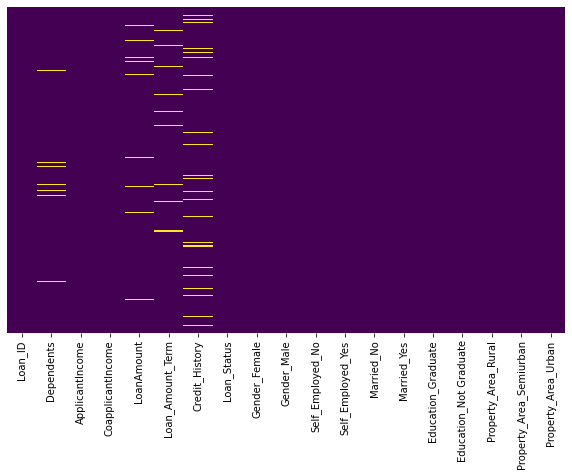

In [516]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna(), cbar=False, cmap='viridis', yticklabels=False)

In [517]:
df = df.drop('Loan_ID', axis=1)

In [518]:
#df_train.loc[df_train['Dependents'] == '3+']['Dependents']= 4
#df_train.loc[df_train['Loan_Status'] == 'Y']['Loan_Status']= 1
#df_train.loc[df_train['Loan_Status'] == 'N']['Loan_Status']= 0
df = df.replace('Y',1)
df = df.replace('N',0)
df = df.replace('3+',4)
df['Loan_Status'] = df['Loan_Status'].astype(int)
df['Dependents'] = df['Dependents'].fillna(0).astype(int)


In [519]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Dependents               614 non-null    int64  
 1   ApplicantIncome          614 non-null    int64  
 2   CoapplicantIncome        614 non-null    float64
 3   LoanAmount               592 non-null    float64
 4   Loan_Amount_Term         600 non-null    float64
 5   Credit_History           564 non-null    float64
 6   Loan_Status              614 non-null    int64  
 7   Gender_Female            614 non-null    uint8  
 8   Gender_Male              614 non-null    uint8  
 9   Self_Employed_No         614 non-null    uint8  
 10  Self_Employed_Yes        614 non-null    uint8  
 11  Married_No               614 non-null    uint8  
 12  Married_Yes              614 non-null    uint8  
 13  Education_Graduate       614 non-null    uint8  
 14  Education_Not Graduate   6

In [520]:
df.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Self_Employed_No,Self_Employed_Yes,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
count,614.000000,614.000000,614.000000,592.000000,600.00000,564.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.827362,5403.459283,1621.245798,146.412162,342.00000,0.842199,0.687296,0.182410,0.796417,0.814332,0.133550,0.346906,0.648208,0.781759,0.218241,0.291531,0.379479,0.328990
std,1.212833,6109.041673,2926.248369,85.587325,65.12041,0.364878,0.463973,0.386497,0.402991,0.389155,0.340446,0.476373,0.477919,0.413389,0.413389,0.454838,0.485653,0.470229
min,0.000000,150.000000,0.000000,9.000000,12.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2877.500000,0.000000,100.000000,360.00000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3812.500000,1188.500000,128.000000,360.00000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,5795.000000,2297.250000,168.000000,360.00000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,4.000000,81000.000000,41667.000000,700.000000,480.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [521]:
imputer = SimpleImputer(strategy='mean')
imputed = imputer.fit_transform(df)
df = pd.DataFrame(imputed, columns=df.columns)

In [522]:
df['Total_income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['income_per_person'] = df['Total_income']/(df['Dependents']+1)
df['Monthly_installment'] = df['LoanAmount']*1000/ df['Loan_Amount_Term']


In [523]:
corr = df.corr()['Loan_Status'][1:]

# absolute for positive values
abs_corr = abs(corr)
abs_corr = abs_corr.sort_values(ascending=False)

# random threshold for features to keep
cor_feature = abs_corr[:11]
cor_feature.index

Index(['Loan_Status', 'Credit_History', 'Property_Area_Semiurban',
       'Property_Area_Rural', 'Married_No', 'Education_Graduate',
       'Education_Not Graduate', 'Married_Yes', 'CoapplicantIncome',
       'Property_Area_Urban', 'LoanAmount'],
      dtype='object')

In [524]:
y = df['Loan_Status']
X = df[cor_feature.index]
X = X.drop('Loan_Status',axis =1)

In [525]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

Applying all algorithms

In [526]:
def applyDecisionTree(X_train,y_train):
    DT_clf = DecisionTreeClassifier(criterion='entropy', min_samples_split=4, random_state=42)
    DT_clf.fit(X_train,y_train)
    DTC_predictions = DT_clf.predict(X_test)
    return accuracy_score(y_test,DTC_predictions)

In [527]:
def applyLogisticRegression(X_train,y_train):
    lg=LogisticRegression(C=1, penalty='l2', solver='liblinear')
    lg.fit(X_train, y_train)
    lg_predictions = lg.predict(X_test)
    return accuracy_score(y_test,lg_predictions)

In [541]:
def applySVM(X_train,y_train):
    svm_classifier = svm.LinearSVC(loss='hinge', penalty='l2', tol=0.1, C=50)
    svm_classifier.fit(X_train,y_train)
    svm_predictions = svm_classifier.predict(X_test)
    return accuracy_score(y_test,svm_predictions)

In [533]:
def applyKNN(X_train,y_train):
    knn_classifier = KNeighborsClassifier(n_neighbors = 8)
    knn_classifier.fit(X_train, y_train)
    knn_predictions = knn_classifier.predict(X_test)
    return accuracy_score(y_test,knn_predictions)

In [530]:
def applyRandomForest(X_train,y_train):
    rf_model = RandomForestClassifier(n_estimators = 10)
    rf_model.fit(X_train, y_train)
    rf_predictions = rf_model.predict(X_test)
    return accuracy_score(y_test,rf_predictions)

GridSearch

In [534]:
param_grid_DT = {'criterion': ['gini', 'entropy'],
                 'splitter': ['best','random'],
                 'min_samples_split': [ 2,3,4,5,6,7,8,9,10 ]}
                          
param_grid_RF = {"n_estimators" : np.arange(50,200,2)}
                          
param_grid_LG = {'C': [0.1, 1, 10, 100, 1000], 
              'penalty': ['l1', 'l2', 'elasticnet', 'none'], 
              'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
                          
param_grid_SVM = {'penalty': ['l2'],
                  'loss': ['hinge', 'squared_hinge'],
                  'C': [0.1, 1, 10, 100, 1000], 
                  'tol': [1, 0.1, 0.01, 0.001, 0.0001]}
                          
param_grid_KNN = {'n_neighbors' : list(range(1, 31))}
                          

In [542]:
decisionTreeAccuracy = applyDecisionTree(X_train,y_train)
print("Decision tree accuracy : ", decisionTreeAccuracy)
print("=========================================================================")
RandomForestAccuracy = applyRandomForest(X_train,y_train)
print("Random Forest accuracy : ", RandomForestAccuracy)
print("=========================================================================")
LogisticRegressionAccuracy = applyLogisticRegression(X_train,y_train)
print("Logistic regression accuracy : ", LogisticRegressionAccuracy)
print("=========================================================================")
SVMAccuracy = applySVM(X_train,y_train)
print("SVM accuracy : ", SVMAccuracy)
print("=========================================================================")
KNNAccuracy = applyKNN(X_train,y_train)
print("KNN accuracy : ", KNNAccuracy)

Decision tree accuracy :  0.7073170731707317
Random Forest accuracy :  0.7317073170731707
Logistic regression accuracy :  0.8048780487804879
SVM accuracy :  0.6829268292682927
KNN accuracy :  0.5934959349593496


/Users/ekanshpruthi/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


###  Best algorithm would be Logistic regression with accuracy :  0.8048780487804879

In [539]:
grid1 = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_DT)
grid1.fit(X_train,y_train)
grid_predictions = grid1.predict(X_test)
cv_dt_accuracy = accuracy_score(y_test, grid_predictions)

grid2 = GridSearchCV(LogisticRegression(solver='liblinear'), param_grid_LG)
grid2.fit(X_train,y_train)
grid_predictions = grid2.predict(X_test)
cv_lg_accuracy = accuracy_score(y_test, grid_predictions)

grid3 = GridSearchCV(RandomForestClassifier(),param_grid_RF)
grid3.fit(X_train,y_train)
grid_predictions = grid3.predict(X_test)
cv_rf_accuracy = accuracy_score(y_test, grid_predictions)

grid4 = GridSearchCV(svm.LinearSVC(), param_grid_SVM)
grid4.fit(X_train,y_train)
grid_predictions = grid4.predict(X_test)
cv_svm_accuracy = accuracy_score(y_test, grid_predictions)

grid5 = GridSearchCV(KNeighborsClassifier(), param_grid_KNN)
grid5.fit(X_train,y_train)
grid_predictions = grid5.predict(X_test)
cv_knn_accuracy = accuracy_score(y_test, grid_predictions)


/Users/ekanshpruthi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ekanshpruthi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ekanshpruthi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ekanshpruthi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ekanshpruthi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ekanshpr

/Users/ekanshpruthi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/ekanshpruthi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ekanshpruthi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/ekanshpruthi/opt/anaconda3/lib/python3.9/site-packages/sklearn/lin

/Users/ekanshpruthi/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/ekanshpruthi/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/ekanshpruthi/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/ekanshpruthi/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/ekanshpruthi/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/lin

/Users/ekanshpruthi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ekanshpruthi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

/Users/ekanshpruthi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/ekanshpruthi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ekanshpruthi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/ekanshpruthi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ekanshpruthi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/ekanshpr

/Users/ekanshpruthi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ekanshpruthi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/ekanshpruthi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ekanshpruthi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/ekanshpruthi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ekanshpr

/Users/ekanshpruthi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/ekanshpruthi/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/Users/ekanshpruthi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/ekanshpruthi/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/ekanshpruthi/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search

/Users/ekanshpruthi/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ekanshpruthi/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ekanshpruthi/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ekanshpruthi/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ekanshpruthi/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ekanshpruthi/opt/anaconda3/lib/python3

/Users/ekanshpruthi/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ekanshpruthi/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ekanshpruthi/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ekanshpruthi/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ekanshpruthi/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ekanshpruthi/opt/anaconda3/lib/python3

/Users/ekanshpruthi/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ekanshpruthi/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ekanshpruthi/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ekanshpruthi/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ekanshpruthi/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ekanshpruthi/opt/anaconda3/lib/python3

/Users/ekanshpruthi/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ekanshpruthi/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ekanshpruthi/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ekanshpruthi/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ekanshpruthi/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ekanshpruthi/opt/anaconda3/lib/python3

/Users/ekanshpruthi/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ekanshpruthi/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ekanshpruthi/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ekanshpruthi/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ekanshpruthi/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ekanshpruthi/opt/anaconda3/lib/python3

In [540]:
print("Decision tree, GRIDSEARCHCV: Best hyperparameters =", grid1.best_params_)
print("Decision tree accuracy with best hyperparameters =", cv_dt_accuracy)
print("=========================================================================")

print("LOGISTIC REGRESSION, GRIDSEARCHCV: Best hyperparameters =", grid2.best_params_)
print("Logistic Regression accuracy with best hyperparameters =", cv_lg_accuracy)
print("=========================================================================")

print("Random Forest, GRIDSEARCHCV: Best hyperparameters =", grid3.best_params_)
print("Random Forest accuracy with best hyperparameters =", cv_rf_accuracy)
print("=========================================================================")

print("SVM, GRIDSEARCHCV: Best hyperparameters =", grid4.best_params_)
print("SVM accuracy with best hyperparameters =", cv_svm_accuracy)
print("=========================================================================")

print("SVM, GRIDSEARCHCV: Best hyperparameters =", grid5.best_params_)
print("SVM accuracy with best hyperparameters =", cv_knn_accuracy)

Decision tree, GRIDSEARCHCV: Best hyperparameters = {'criterion': 'gini', 'min_samples_split': 9, 'splitter': 'random'}
Decision tree accuracy with best hyperparameters = 0.7154471544715447
LOGISTIC REGRESSION, GRIDSEARCHCV: Best hyperparameters = {'C': 0.1, 'penalty': 'none', 'solver': 'newton-cg'}
Logistic Regression accuracy with best hyperparameters = 0.8048780487804879
Random Forest, GRIDSEARCHCV: Best hyperparameters = {'n_estimators': 194}
Random Forest accuracy with best hyperparameters = 0.7073170731707317
SVM, GRIDSEARCHCV: Best hyperparameters = {'C': 0.1, 'loss': 'hinge', 'penalty': 'l2', 'tol': 0.1}
SVM accuracy with best hyperparameters = 0.6178861788617886
SVM, GRIDSEARCHCV: Best hyperparameters = {'n_neighbors': 29}
SVM accuracy with best hyperparameters = 0.6829268292682927


###  LOGISTIC REGRESSION Best hyperparameters = {'C': 0.1, 'penalty': 'none', 'solver': 'newton-cg'}
### Logistic Regression accuracy with best hyperparameters = 0.8048780487804879